In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorrt
import keras

In [47]:
#Importing dataset
from keras.datasets import mnist

In [48]:
#Loading information about the dataset
mnist.load_data?

Signature: mnist.load_data(path='mnist.npz')
Docstring:
Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).

Args:
  path: path where to cache the dataset locally
    (relative to `~/.keras/datasets`).

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data. Pixel values range
  from 0 to 255.

**y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data. Pixel values range
  from 0 to 255.

**y_test**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(10000,)` for the test data.

Example:

```python


In [49]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

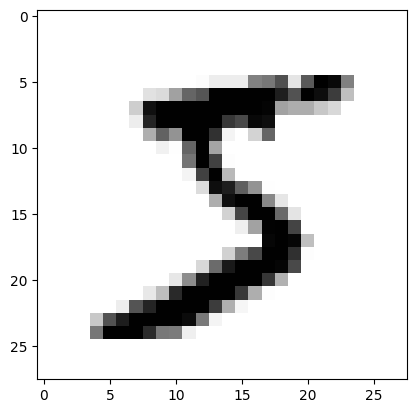

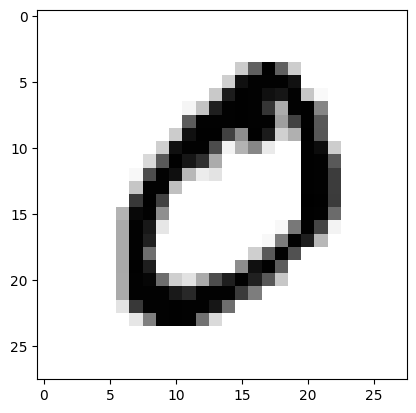

In [50]:
for i in range(2):
    plt.imshow(X_train[i],cmap=('binary'))
    plt.show()

In [51]:
# Pre-processing the images

#converting to float32 and dividing by 255 to normalize image to range[0,1]
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# Expand image dimensions from 2D to 3D i.e (28,28) to (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Set output to either 0 or 1 / one hot encoder / sets column values to 0 or 1
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [53]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation ='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax")) #For classification of digits/ digit images

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [55]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [56]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)
mc = ModelCheckpoint("MNIST-Digit-Recognition/Model/bestmodel.h5", monitor="val_acc", verbose=1, save_best_only=True)
cb = [es,mc]

In [57]:
his = model.fit(X_train, Y_train, epochs = 50, validation_split=0.3,)  #DO NOT RUN THIS, NEEDS HIGH GPU CAPABILITY, you do nbot have

Epoch 1/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.2237 - accuracy: 0.9323 - val_loss: 0.0804 - val_accuracy: 0.9749
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0765 - accuracy: 0.9771 - val_loss: 0.0590 - val_accuracy: 0.9828
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0574 - accuracy: 0.9829 - val_loss: 0.0516 - val_accuracy: 0.9837
Epoch 4/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0467 - accuracy: 0.9848 - val_loss: 0.0486 - val_accuracy: 0.9857
Epoch 5/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0383 - accuracy: 0.9882 - val_loss: 0.0443 - val_accuracy: 0.9867
Epoch 6/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0457 - val_accuracy: 0.9863
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0425 - val_accuracy:

In [58]:
model.save("/home/Komi/Desktop/MNIST-Digit-Recognition/Model/Model.hd5")

INFO:tensorflow:Assets written to: /home/Komi/Desktop/MNIST-Digit-Recognition/Model/Model.hd5/assets


INFO:tensorflow:Assets written to: /home/Komi/Desktop/MNIST-Digit-Recognition/Model/Model.hd5/assets


In [ ]:
##LOADING MODEL

In [59]:
model_S = keras.models.load_model("/home/Komi/Desktop/MNIST-Digit-Recognition/Model/Model.hd5")
score = model_S.evaluate(X_test, Y_test)
print(f"ACCURACY: {score[1]} and val_loss: {score[0]}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9920
ACCURACY: 0.9919999837875366 and val_loss: 0.04768034815788269


In [ ]:
'''#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import itertools
#Defining a function for confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Predicting the values from the validation dataset
y_pred = model.predict(X_test)
#Converting predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
#Converting validation observations to one hot vectors
y_true = np.argmax(Y_test,axis = 1)
#Computing the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
#Plotting the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
'''#To display some error results

errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_val_errors = X_test[errors]

#Defining a function for plotting the erros results
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 12 images with their predicted and real labels"""
    nrows = 4
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5)
    for i, axi in enumerate(ax.flat):
        if i < len(errors_index):
            error = errors_index[i]
            axi.imshow((img_errors[error]).reshape((28,28)))
            axi.set_title("Predicted label: {}\nTrue label: {}".format(pred_errors[error], obs_errors[error]))
        axi.set_xticks([])
        axi.set_yticks([])

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors, axis=1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_delta_errors = np.argsort(delta_pred_true_errors)

# Top 12 errors
most_important_errors = sorted_delta_errors[-12:]

# Displaying the top 12 errors
display_errors(most_important_errors, X_val_errors, y_pred_classes_errors, y_true_errors)

313/313 [==============================] - 0s 467us/step


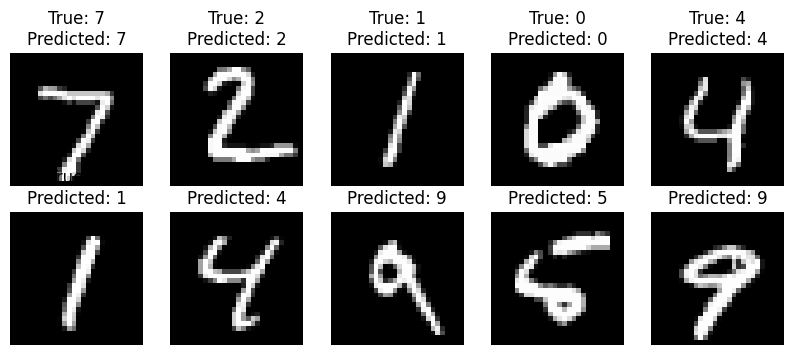

In [60]:
## Displaying outputs

predictions = model_S.predict(X_test)
predicted_labels = np.argmax(predictions, axis = 1)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    true_label = np.argmax(Y_test[i])
    predicted_label = predicted_labels[i]
    title = f'True: {true_label}\nPredicted: {predicted_label}'
    plt.title(title)
    plt.axis('off')
plt.show()